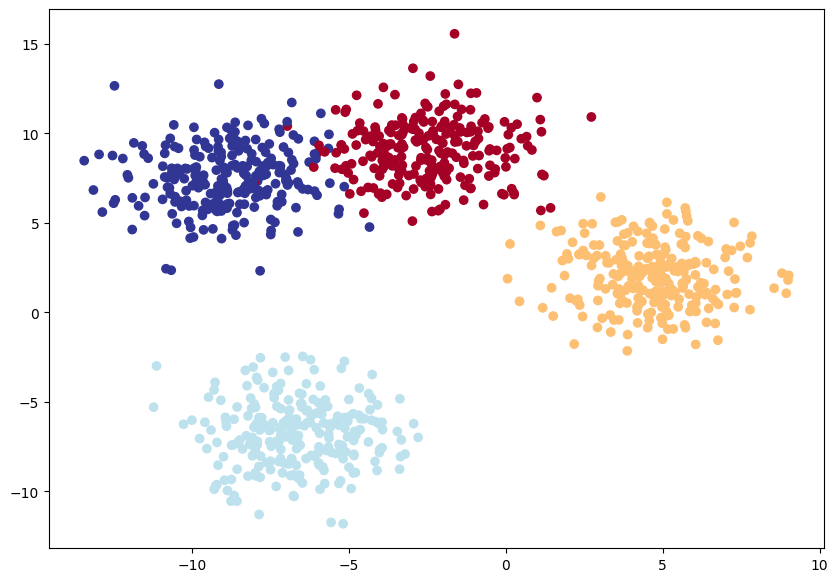

In [23]:
#import dependicies
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set hyperparameters for data collection
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.7,
                            random_state=RANDOM_SEED)
#2.turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#3. split into train and test

X_blob_train, X_blob_test, y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size=0.2,
                                                                       random_state=RANDOM_SEED)
#4.plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

                            

8. building a multiclass classification model in pytorch



In [24]:
#creating device agnostic code
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "gpu"

device

'cuda'

In [25]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            #nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features= output_features)
        )

    def forward(self,x):
        return self.linear_layer_stack(x)

#create an instance of blobmodel and send it to the target device

model_4 = BlobModel(input_features = 2,
                    output_features=4,
                    hidden_units=8).to(device)

In [26]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [27]:
#create a loss function and an optimizer for the multi-class model

#loss function
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(model_4.parameters(),
                             lr=0.1)




Getting prediction probabilities for a multi-class pytorch model

In [28]:
#let's get some raw outputs of our mdoel

next(model_4.parameters()).device

device(type='cuda', index=0)

In [29]:
X_blob_test.device

device(type='cpu')

8.4 Getting prediction probabilities for a multi-class pytoech model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits-> pred probs->pred labels



In [30]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))


y_logits[:10]

tensor([[-1.2774, -0.8564, -1.5108, -0.5534],
        [ 1.6929, -1.2183,  1.7117,  2.0755],
        [ 2.2286,  0.7896,  2.5920,  0.9880],
        [-0.7610, -0.3589, -0.8697, -0.5185],
        [-0.5210, -1.6301, -0.7885,  0.6294],
        [ 2.1134, -1.3835,  2.1514,  2.5335],
        [ 1.7651,  0.9184,  2.0996,  0.5233],
        [ 0.1300, -1.4742, -0.0484,  1.0284],
        [ 3.0250,  0.7139,  3.4591,  1.6768],
        [-0.1032, -1.5041, -0.3097,  0.8660]], device='cuda:0')

In [31]:
#convert our model's logit outputs to predicton probabilities

y_pred_probs = torch.softmax(y_logits,dim=1)


y_logits[:5], y_pred_probs[:5]

(tensor([[-1.2774, -0.8564, -1.5108, -0.5534],
         [ 1.6929, -1.2183,  1.7117,  2.0755],
         [ 2.2286,  0.7896,  2.5920,  0.9880],
         [-0.7610, -0.3589, -0.8697, -0.5185],
         [-0.5210, -1.6301, -0.7885,  0.6294]], device='cuda:0'),
 tensor([[0.1860, 0.2833, 0.1472, 0.3835],
         [0.2825, 0.0154, 0.2879, 0.4142],
         [0.3373, 0.0800, 0.4851, 0.0976],
         [0.2143, 0.3204, 0.1922, 0.2731],
         [0.1903, 0.0628, 0.1456, 0.6013]], device='cuda:0'))

In [32]:
#convert our model's prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)

y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 2, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [33]:
torch.argmax(y_pred_probs[0])

tensor(3, device='cuda:0')

In [34]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [35]:
#calculate accuracy-out of 100 examples,what percentage does our model get right?

def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [36]:
#training loop 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

#put data to target device

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    #training
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss =loss_fn(y_logits,y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_preds)
        
        #print what's happening
        if epoch % 10 ==0:
            print(f"Epoch: {epoch}, Training Loss: {loss:.4f}, Acc:{acc:.2f}% | test loss:{test_loss:.4f}, Test acc:{test_acc:.2f}%")
              




Epoch: 0, Training Loss: 1.0464, Acc:64.00% | test loss:0.5857, Test acc:94.00%
Epoch: 10, Training Loss: 0.1622, Acc:98.25% | test loss:0.1472, Test acc:98.50%
Epoch: 20, Training Loss: 0.1001, Acc:98.38% | test loss:0.0896, Test acc:98.50%
Epoch: 30, Training Loss: 0.0790, Acc:98.38% | test loss:0.0686, Test acc:99.00%
Epoch: 40, Training Loss: 0.0688, Acc:98.38% | test loss:0.0582, Test acc:99.00%
Epoch: 50, Training Loss: 0.0629, Acc:98.38% | test loss:0.0521, Test acc:99.00%
Epoch: 60, Training Loss: 0.0592, Acc:98.38% | test loss:0.0481, Test acc:99.00%
Epoch: 70, Training Loss: 0.0567, Acc:98.38% | test loss:0.0453, Test acc:99.00%
Epoch: 80, Training Loss: 0.0549, Acc:98.38% | test loss:0.0432, Test acc:99.00%
Epoch: 90, Training Loss: 0.0535, Acc:98.38% | test loss:0.0417, Test acc:99.00%


In [37]:
#visualization

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]


tensor([[  4.1746,  10.0271, -14.9041,  -9.2013],
        [  5.3014, -11.8094,   2.9633,  10.3894],
        [ -5.1614, -12.4819,  20.3200,  11.6325],
        [  1.4876,   7.1135,  -7.9775,  -6.4144],
        [  7.9682,   3.3927, -15.0009,  -3.4595],
        [  6.0474, -15.0804,   4.7157,  13.2889],
        [ -5.7096,  -8.9601,  18.0251,   8.4952],
        [  7.0049,  -1.0224,  -9.4813,   0.5742],
        [ -4.9691, -18.3027,  25.2559,  16.8613],
        [  7.2165,   0.5997, -11.2814,  -0.8991]], device='cuda:0')

In [38]:
#go from logits -> prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.8646e-03, 9.9714e-01, 1.4834e-11, 4.4460e-09],
        [6.1288e-03, 2.2712e-10, 5.9148e-04, 9.9328e-01],
        [8.5807e-12, 5.6790e-15, 9.9983e-01, 1.6866e-04],
        [3.5904e-03, 9.9641e-01, 2.7829e-07, 1.3284e-06],
        [9.8979e-01, 1.0197e-02, 1.0476e-10, 1.0778e-05],
        [7.1560e-04, 4.7753e-13, 1.8895e-04, 9.9910e-01],
        [4.9214e-11, 1.9074e-12, 9.9993e-01, 7.2643e-05],
        [9.9807e-01, 3.2578e-04, 6.9068e-08, 1.6081e-03],
        [7.4710e-14, 1.2096e-19, 9.9977e-01, 2.2605e-04],
        [9.9837e-01, 1.3354e-03, 9.2413e-09, 2.9833e-04]], device='cuda:0')

In [39]:
#go from pred probs to pred labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:100]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 0,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2], device='cuda:0')

In [40]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [41]:
## make predictions and evaluate the mdoel

import requests
from pathlib import Path

#download helper function rom learn pytorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")

else:
    print("Download helper_functions.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


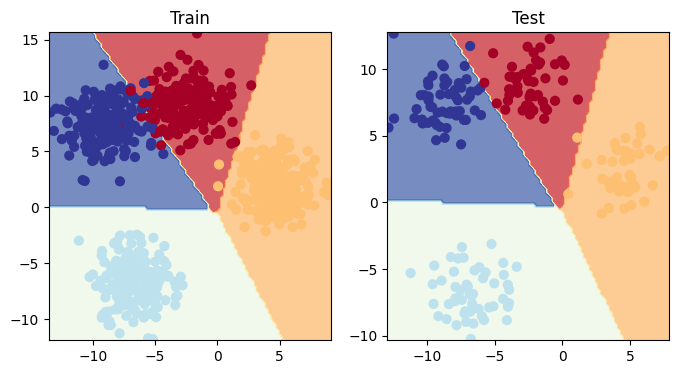

In [42]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)


In [68]:
from torchmetrics import Accuracy

#setup metrics
torchmetric_accuracy = Accuracy().to(device)

#calcualate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'